# House M.D. 

We are going to see what kind of patterns we can find in the House M.D. subtitles. Starting with a single episode.

In [1]:
import utils
import re
from stemming.porter2 import stem
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

Load in the dataframe

In [4]:
df = utils.load_data("./data/house-s1-e1")
df["text"] = df["text"].map(lambda x: x.replace("\n",''))
df["original_text"] = df["text"]
df.head()

,end,start,text,original_text
0,527,00:00:45,Why are you late?,Why are you late?
1,527,00:00:45,You're not going to,You're not going to
2,527,00:00:45,like the answer.,like the answer.
3,527,00:00:48,I already know the answer.,I already know the answer.
4,527,00:00:48,I missed the bus.,I missed the bus.


Looks like the sentiment analysis is struggling with sarcasm

Clean the data (removing stopwords)

In [5]:
with open("stop_words.txt") as stop_words:
    stop_words = [word.strip("\n") for word in stop_words]
shitty_stemming = ["why", "while"]
punctuation = ',?."'
def clean(words):
    new_words = ""
    for w in words.split():
        w = w.lower()
        w = w.strip(punctuation)
        w = stem(w)
        if len(w) == 1 and w != 'i':
            continue
        if w in stop_words:
            continue
        new_words += (' ' + w)
    return new_words
df["text"] = df["text"].map(lambda x: clean(x))
print(df.head())

   end     start                  text               original_text
0  527  00:00:45              whi late           Why are you late?
1  527  00:00:45              you'r go         You're not going to
2  527  00:00:45           like answer            like the answer.
3  527  00:00:48   alreadi know answer  I already know the answer.
4  527  00:00:48              miss bus           I missed the bus.


Get the word frequencies

In [6]:
freq = {}
for i, words in df["text"].iteritems():
    for word in words.split():
        if word in freq:
            freq[word] = freq[word] + 1
        else:
            freq[word] = 1
freq_df = pd.DataFrame.from_dict({"word":list(freq.keys()), "freq":list(freq.values())})
freq_df = freq_df[freq_df["freq"] > 1].sort_values(by="freq", ascending=False)
freq_df.head()

,freq,word
10,39,don't
197,37,get
113,32,think
2,31,you'r
104,29,i'm


Graph the most frequent words

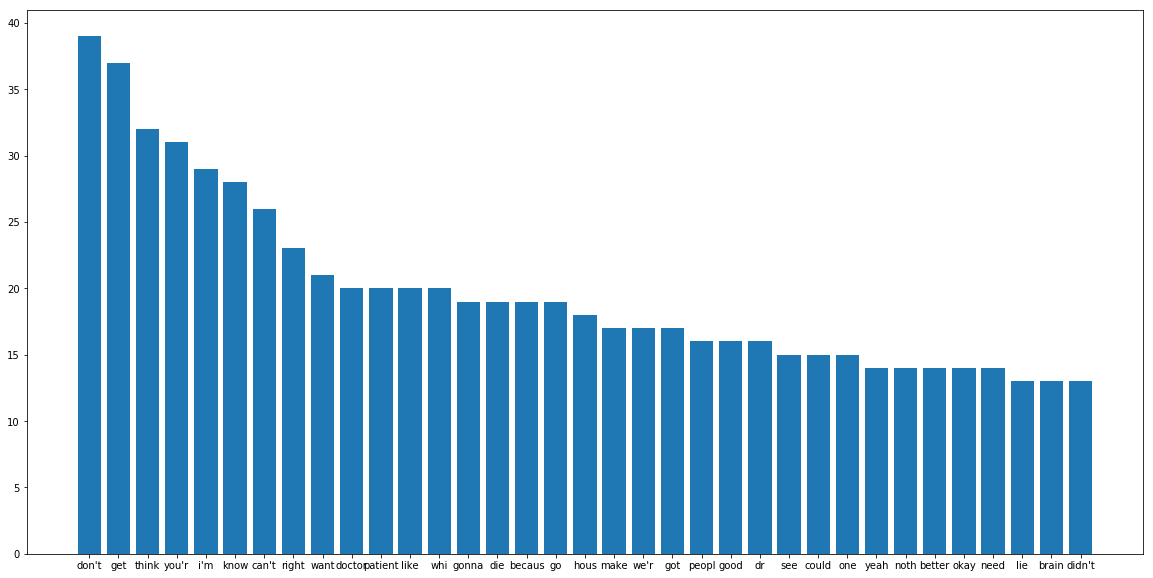

In [7]:
fig = plt.figure(figsize=(20, 10))
x = freq_df["word"][freq_df["freq"] > 12]
y = freq_df["freq"][freq_df["freq"] > 12]
ind = np.arange(x.size)
plt.xticks(ind, x)
plt.bar(ind, height=y)
plt.show()

Let's look at the sentiment of the show as a whole

In [8]:
df["sentiment"] = df["original_text"].map(lambda x: TextBlob(x).sentiment.polarity)
df.describe()

,sentiment
count,1181.000000
mean,0.032016
std,0.224034
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df["original_text"][df["sentiment"] == -1]

83     She's going to die. Boring.
834                     You idiot!
Name: original_text, dtype: object

In [10]:
df["original_text"][df["sentiment"] == 1]

214     Excellent. We have a point of agreement--
746                          Excellent diagnosis.
883                   It's really very beautiful.
902         Don't you see? It fits. It's perfect.
1081                            But not the best.
1091          that gain them the greatest rewards
1137                  is the best doctor we have.
Name: original_text, dtype: object

In [11]:
df.iloc[902]["original_text"]

"Don't you see? It fits. It's perfect."

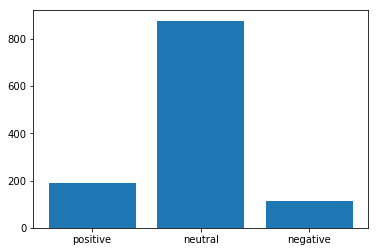

In [12]:
ind = np.arange(3)
pos = df["sentiment"][df["sentiment"] > 0.0].size
neutral = df["sentiment"][df["sentiment"] == 0.0].size
neg = df["sentiment"][df["sentiment"] < 0.0].size
plt.xticks(ind, ("positive", "neutral", "negative"))
plt.bar(ind, (pos, neutral, neg))
plt.show()

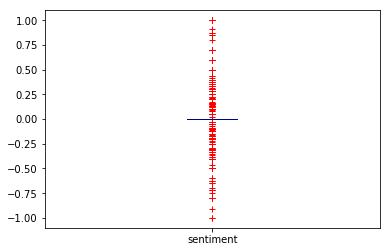

In [13]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box("sentiment", color=color, sym='r+')
plt.show()

Let's see if there are any patterns related to time and the sentiment of the text.

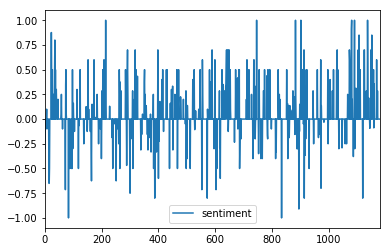

In [16]:
df.plot.line(np.arange(df["sentiment"].size), "sentiment")
plt.show()

Basically, didn't find anything interesting :D. House maybe too sarcastic...